<a href="https://colab.research.google.com/github/Varsh999/MLprojectssss/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📥 Loading MNIST dataset...
✅ Dataset loaded: 70000 samples, each of size 784 pixels


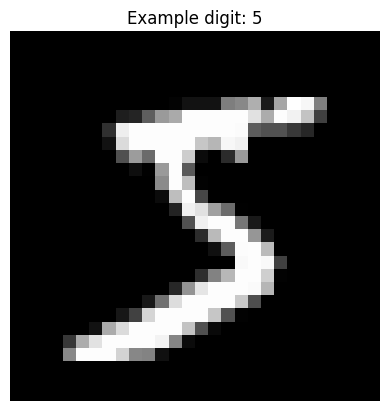

Train size: (60000, 784), Test size: (10000, 784)

🚀 Training SGD Classifier...
✅ Model training complete!

📊 Evaluating Performance...

Confusion Matrix:
[[8939  124]
 [ 218  719]]

Precision: 0.8529
Recall: 0.7673
F1 Score: 0.8079

📈 Plotting ROC Curve...


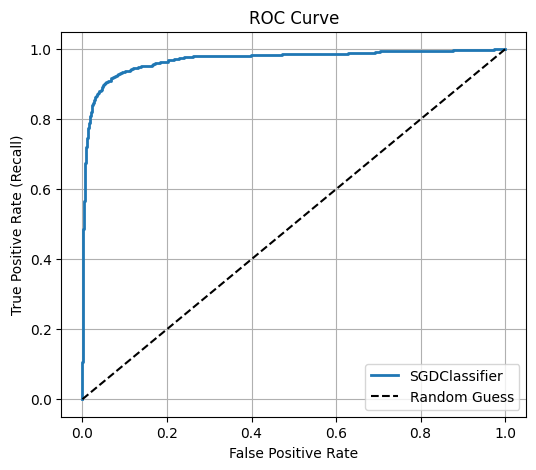

ROC AUC Score: 0.9709

✅ Done! Model evaluated successfully.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)


print("📥 Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

print(f"✅ Dataset loaded: {X.shape[0]} samples, each of size {X.shape[1]} pixels")


index = 0
sample_digit = X.iloc[index].to_numpy().reshape(28, 28)
plt.imshow(sample_digit, cmap="gray")
plt.title(f"Example digit: {y[index]}")
plt.axis("off")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print("\n🚀 Training SGD Classifier...")
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train_5)
print("✅ Model training complete!")

y_pred = clf.predict(X_test)


print("\n📊 Evaluating Performance...")
cm = confusion_matrix(y_test_5, y_pred)
precision = precision_score(y_test_5, y_pred)
recall = recall_score(y_test_5, y_pred)
f1 = f1_score(y_test_5, y_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


print("\n📈 Plotting ROC Curve...")
y_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="SGDClassifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

roc_auc = roc_auc_score(y_test_5, y_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\n✅ Done! Model evaluated successfully.")
